# IPUMS Social Data for Americas

#  1. Preparing the Dataset

In [1]:
!pip install pandas


In [50]:
# Import Library
import os
import pandas as pd
import arcpy

## Subseting the Country: Mexico

In [76]:
# Define the chunk size (number of rows to load at a time)
chunk_size = 1000000

# Path to the original CSV file downloaded from box: 20240325_InternationalDemographicData\IPUMS\IPUMS_Americas_All
# stored into the local computer
# remember to use 'r' infront of the file path if you use '\'.
csv_file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipumsi_00021.csv\ipumsi_00021.csv'

# Path to save intended country with applicable year, CSV naming convention: '{Country}_ipums_{Year}': e.g. 'Mexico_ipums_2020'
output_file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipums_americas_data\Mexico_ipums_2020.csv'

# Initialize iteration counter and header flag
counter = 0
header_written = False

# Loop through the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(csv_file_path, iterator=True, chunksize=chunk_size)):
    # Increment the iteration counter
    counter += 1

    # Apply multiple filters to the chunk
    # Define 'COUNTRY' and 'YEAR' code for the filter
    # Here example for Mexico: 'COUNTRY': 484, 'YEAR': 2020
    filtered_chunk = chunk[(chunk['COUNTRY'] == 484) & (chunk['YEAR'] == 2020)]
    
    # Filter out columns where all row values of the particular column are NaN
    filtered_chunk = filtered_chunk.dropna(axis=1, how='all')  


     # Ensure column consistency
    if not filtered_chunk.empty:
        if not header_written:
            filtered_chunk.to_csv(output_file_path, mode='w', index=False)
            header_written = True  # Write header only once
        else:
            filtered_chunk.to_csv(output_file_path, mode='a', header=False, index=False)
    # Print the current iteration number
    print(f"Iteration {counter} completed")

# After the loop, print the total number of iterations
print(f"Total number of iterations: {counter}")


Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed
Iteration 11 completed
Iteration 12 completed
Iteration 13 completed
Iteration 14 completed
Iteration 15 completed
Iteration 16 completed
Iteration 17 completed
Iteration 18 completed
Iteration 19 completed
Iteration 20 completed
Iteration 21 completed
Iteration 22 completed
Iteration 23 completed
Iteration 24 completed
Iteration 25 completed
Iteration 26 completed
Iteration 27 completed
Iteration 28 completed
Iteration 29 completed
Iteration 30 completed
Iteration 31 completed
Iteration 32 completed
Iteration 33 completed
Iteration 34 completed
Iteration 35 completed
Iteration 36 completed
Iteration 37 completed
Iteration 38 completed
Iteration 39 completed
Iteration 40 completed
Iteration 41 completed
Iteration 42 completed
Iteration 43 completed
Iteration 44 complet

In [52]:
# Path to the output csv file for your intended country
file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipums_americas_data\Mexico_ipums_2020.csv'

# load the output csv file for intended country
df = pd.read_csv(file_path)

# Prview Datafrane
df.head()


,COUNTRY,YEAR,SAMPLE,SERIAL,HHWT,URBAN,GEOLEV1,GEOLEV2,POPDENSGEO2,GEO2_MX2020,OWNERSHIP,OWNERSHIPD,ELECTRIC,INTERNET,PERNUM,PERWT,EDATTAIN,EDATTAIND,EMPSTAT,EMPSTATD,INCEARN,MX2020A_AFRDES,MX2020A_INDIG
0,484,2020,484202001,1000,59.0,2,484001,484001001,562.77002,1001.0,1,100,1,2,1,59.0,4,400,3,310,99999999.0,2.0,2.0
1,484,2020,484202001,1000,59.0,2,484001,484001001,562.77002,1001.0,1,100,1,2,2,59.0,3,312,3,330,99999999.0,2.0,2.0
2,484,2020,484202001,1000,59.0,2,484001,484001001,562.77002,1001.0,1,100,1,2,3,59.0,1,110,2,200,99999999.0,2.0,2.0
3,484,2020,484202001,2000,59.0,2,484001,484001001,562.77002,1001.0,1,100,1,2,1,59.0,4,400,1,110,21500.0,2.0,2.0
4,484,2020,484202001,2000,59.0,2,484001,484001001,562.77002,1001.0,1,100,1,2,2,59.0,4,400,1,110,8600.0,2.0,2.0


In [54]:
# Iterate over all columns
for col in df.columns:
    # Check if the column is a float type and if all decimal parts are zero
    if pd.api.types.is_float_dtype(df[col]) and (df[col] % 1 == 0).all():
        # Convert the column to int if all decimal values are 0
        df[col] = df[col].astype(int)

# Display the DataFrame and its dtypes to confirm the conversion
print(df)
print(df.dtypes)


          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[15015683 rows x 23 columns

## Variables

To organize the data extraction process, create a separate folder for each country and extract all variables as CSV files into their respective folders. This organization is crucial for merging all variables into a single CSV file later.

### Variable: "OWNERSHIP"
* Name: OWNERSHIP
* Label: Ownership of dwelling [general version]
* VariableText:OWNERSHIP indicates whether a member of the household owned the housing unit.Households that acquired their unit with a mortgage or other lending arrangement wereunderstood to "own" their unit even if they had not yet completed repayment. For thosethat did not own their housing unit, several options were possible: renting (from varioustypes of owners), subletting, usufruct, and de facto occupation.
* Concept: Household Economic Variables -- HOUSEHOLD
* List of Values with Label: 0 (NIU/not in universe); 1 (Owned); 2 (Not owned), 9 (Unknown)




In [79]:
# Get the unique values of 'OWNERSHIP' column
df.OWNERSHIP.unique()

# Filtering out rows where 'OWNERSHIP' = 0 since 0 equal to NIU(Not in universe)
filtered_df = df[df['OWNERSHIP']!= 0]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[14978866 rows x 23 columns

In [80]:
# Group by GEO2_MX2020 and OWNERSHIP, summing the 'HHWT' for calculation estimated household for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'OWNERSHIP']).agg(Estimated_HH=('HHWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated household for each smaller geographic region
Estimated_household = grouped_data.groupby('GEO2_MX2020')['Estimated_HH'].sum().reset_index(name='Estimated_HH_GEOL2')
print(Estimated_household)

# Merge the estimated household back to the grouped data
grouped_data = grouped_data.merge(Estimated_household, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people  by municipality
grouped_data['pct'] = grouped_data['Estimated_HH'] / grouped_data['Estimated_HH_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  OWNERSHIP  Estimated_HH
0            1001          1        655119
1            1001          2        287356
2            1002          1         43069
3            1002          2          8222
4            1003          1         37839
...           ...        ...           ...
5257        32056          2         44478
5258        32057          1         18665
5259        32057          2          1784
5260        32058          1          1763
5261        32058          2           996

[5262 rows x 3 columns]
      GEO2_MX2020  Estimated_HH_GEOL2
0            1001              942475
1            1002               51291
2            1003               58155
3            1004               16952
4            1005              129850
...           ...                 ...
2464        32054               19426
2465        32055               31362
2466        32056              147845
2467        32057               20449
2468        32058                2759

[2

#### Calculating estimated households of "OWNERSHIP" Var

Variable List:
* 1 : OWNED_HH
* 2 : UNOWNED_HH
* 9 : OWNED_UK_HH

In [81]:
## Create a pivot table with 'OWNERSHIP' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='OWNERSHIP',   # Columns will be EDATTAIN categories
    values='Estimated_HH',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table1 = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "OWNERSHIP" variable
# rename it based on datatsets.
pivot_table_OWNERSHIP = pivot_table1.rename(columns={1: 'OWNED_HH', 2: 'UNOWNED_HH', 
                                       9 : 'OWNED_UK_HH' })

# Export the DataFrame to a CSV file
pivot_table_OWNERSHIP.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_OWNERSHIP.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print("\nPivot table:\n", pivot_table_OWNERSHIP)

OWNERSHIP         1       2  9
GEO2_MX2020                   
1001         655119  287356  0
1002          43069    8222  0
1003          37839   20316  0
1004          13988    2964  0
1005          90189   39661  0
...             ...     ... ..
32054         16664    2762  0
32055         21752    9610  0
32056        103367   44478  0
32057         18665    1784  0
32058          1763     996  0

[2469 rows x 3 columns]

Pivot table:
 OWNERSHIP  GEO2_MX2020  OWNED_HH  UNOWNED_HH  OWNED_UK_HH
0                 1001    655119      287356            0
1                 1002     43069        8222            0
2                 1003     37839       20316            0
3                 1004     13988        2964            0
4                 1005     90189       39661            0
...                ...       ...         ...          ...
2464             32054     16664        2762            0
2465             32055     21752        9610            0
2466             32056    103367   

#### Calculatiing percentage of "OWNERSHIP" Var

Variable List:
* 1 : OWNED_PCT
* 2 : UNOWNED_PCT 
* 9 : OWNED_UK_PCT

In [82]:
## Create a pivot table with 'OWNERSHIP' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='OWNERSHIP',   # Columns will be 'OWNERSHIP' categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "EDATTAIN" variable
# rename it based on datatsets.
pivot_table_OWNERSHIP = pivot_table.rename(columns= {1: 'OWNED_PCT', 2: 'UNOWNED_PCT', 9 : 'OWNED_UK_PCT' })
                                       
# Print Ownership variable in a pivot table
print("\nPivot table:\n", pivot_table_OWNERSHIP)

OWNERSHIP  GEO2_MX2020      1      2    9
0                 1001  69.51  30.49  0.0
1                 1002  83.97  16.03  0.0
2                 1003  65.07  34.93  0.0
3                 1004  82.52  17.48  0.0
4                 1005  69.46  30.54  0.0
...                ...    ...    ...  ...
2464             32054  85.78  14.22  0.0
2465             32055  69.36  30.64  0.0
2466             32056  69.92  30.08  0.0
2467             32057  91.28   8.72  0.0
2468             32058  63.90  36.10  0.0

[2469 rows x 4 columns]

Pivot table:
 OWNERSHIP  GEO2_MX2020  OWNED_PCT  UNOWNED_PCT  OWNED_UK_PCT
0                 1001      69.51        30.49           0.0
1                 1002      83.97        16.03           0.0
2                 1003      65.07        34.93           0.0
3                 1004      82.52        17.48           0.0
4                 1005      69.46        30.54           0.0
...                ...        ...          ...           ...
2464             32054      8

In [83]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_OWNERSHIP['GEO2_MX2020'] = pivot_table_OWNERSHIP['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on OWNERSHIP
OWNERSHIP_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_OWNERSHIP.csv')

# merge the PCT data to the OWNERSHIP_CSV_fil
merged_data = OWNERSHIP_CSV_file.merge(pivot_table_OWNERSHIP, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_OWNERSHIP.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  OWNED_HH  UNOWNED_HH  ...  OWNED_PCT  UNOWNED_PCT  OWNED_UK_PCT
0            1001    655119      287356  ...      69.51        30.49           0.0
1            1002     43069        8222  ...      83.97        16.03           0.0
2            1003     37839       20316  ...      65.07        34.93           0.0
3            1004     13988        2964  ...      82.52        17.48           0.0
4            1005     90189       39661  ...      69.46        30.54           0.0
...           ...       ...         ...  ...        ...          ...           ...
2464        32054     16664        2762  ...      85.78        14.22           0.0
2465        32055     21752        9610  ...      69.36        30.64           0.0
2466        32056    103367       44478  ...      69.92        30.08           0.0
2467        32057     18665        1784  ...      91.28         8.72           0.0
2468        32058      1763         996  ...      63.90        36.10           0.0

[24

### Variable: "EDATTAIN"
* Name: EDATTAIN
* Label: Educational attainment, international recode [general version]
* VariableText: EDATTAIN records the person's educational attainment in terms of the level of schoolingcompleted (degree or other milestone). The emphasis on level completed is critical: aperson attending the final year of secondary education receives the code for havingcompleted lower secondary only -- and in some samples only primary. EDATTAIN does not necessarily reflect any particular country's definition of the various levelsof schooling in terms of terminology or the number of years of schooling. EDATTAIN is anattempt to merge  into a single, roughly comparable variable -- samples that providedegrees, ones that provide actual years of schooling, and those that have some of both. Inaddition to EDATTAIN, a country-specific education classification is provided which loses noinformation and reflects the particular educational system of that country (for exampleEDUCBR for Brazil, EDUCCL for Chile, and EDUCUS for the United States). As always, userscan refer to the original education source variables for each sample, if they wish. Many samples also give single years of schooling completed, recorded in YRSCHOOL. Somesamples provide educational information in a form that could not be incorporated into EDATTAIN.
* Concept: Education Variables -- PERSON
* List of Values with Label: 0 (NIU/not in universe); 1 (Less than primary completed);
    2 (Primary completed); 3 (Secondary completed); 4 (University completed); 9 (Unknown)
    

In [67]:
# Get the unique values of 'EDATTAIN' column
df.EDATTAIN.unique()

#Filtering out rows where 'EDATTAIN' = 0 since 0 equal to NIU(Not in universe)
filtered_df = df[df['EDATTAIN']!= 0]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[14217576 rows x 23 columns

In [68]:
# Group by GEO2_MX2020 and EDATTAIN, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'EDATTAIN']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO2_MX2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the total weights back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people  by municipality
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

       GEO2_MX2020  EDATTAIN  Estimated_pop
0             1001         1         199619
1             1001         2         358805
2             1001         3         197654
3             1001         4         143791
4             1001         9           1393
...            ...       ...            ...
12135        32058         1           1002
12136        32058         2           1190
12137        32058         3            295
12138        32058         4            149
12139        32058         9              8

[12140 rows x 3 columns]
      GEO2_MX2020  Estimated_pop_GEOL2
0            1001               901262
1            1002                48275
2            1003                55019
3            1004                15959
4            1005               122544
...           ...                  ...
2464        32054                18042
2465        32055                29987
2466        32056               140760
2467        32057                19052
2468        32058

#### Calculating Estimated Pop for "EDATTAIN" var

Variable List:
* 1 : EDU_LESS_PRIM_POP
* 2 : EDU_PRIM_POP
* 3 : EDU_SEC_POP
* 4 : EDU_UNI_POP
* 9 : EDU_UK_POP

In [69]:

## Create a pivot table with EDATTAIN categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='EDATTAIN',   # Columns will be EDATTAIN categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table1 = pivot_table.reset_index()
print(pivot_table1)

# Rename the columns of pivot table for "EDATTAIN" variable
# rename it based on datatsets.
pivot_table_EDATTAIN = pivot_table1.rename(columns={1: 'EDU_LESS_PRIM_POP', 2: 'EDU_PRIM_POP',3: 'EDU_SEC_POP',4:'EDU_UNI_POP', 
                                       9 : 'EDU_UK_POP' })

# Print "EDATTAIN" variable in a pivot table
print("\nPivot table:\n", pivot_table_EDATTAIN)


EDATTAIN  GEO2_MX2020       1       2       3       4     9
0                1001  199619  358805  197654  143791  1393
1                1002   15980   23779    6551    1907    58
2                1003   18892   27660    6458    1943    66
3                1004    4813    7961    2525     638    22
4                1005   35344   47933   22332   16752   183
...               ...     ...     ...     ...     ...   ...
2464            32054    6733    9380    1596     291    42
2465            32055    9866   14619    3742    1745    15
2466            32056   29428   49517   29300   32285   230
2467            32057    5862   10114    2311     730    35
2468            32058    1002    1190     295     149     8

[2469 rows x 6 columns]

Pivot table:
 EDATTAIN  GEO2_MX2020  EDU_LESS_PRIM_POP  ...  EDU_UNI_POP  EDU_UK_POP
0                1001             199619  ...       143791        1393
1                1002              15980  ...         1907          58
2                1003      

In [70]:
# Add Year  variable in the pivot table
# Since year values are constant 
# Create a new coloumn for the pivot table
pivot_table_EDATTAIN['YEAR'] = '2020'

# Calculate the total population of Mexico
pivot_table_EDATTAIN['TOTAL_POP_MX20'] = df['PERWT'].sum()
# Reorder columns to place the new columns after 'YEAR' and 'TOTAL_POP_MX20' after 'YEAR'
cols = ['YEAR', 'TOTAL_POP_MX20'] + [col for col in pivot_table_EDATTAIN.columns if col not in ['YEAR', 'TOTAL_POP_MX20']]
pivot_table_EDATTAIN = pivot_table_EDATTAIN[cols]

# # Add the index column to the exported table
# PR_pivot_table_Race.reset_index(inplace=True)
print("\nPivot table:\n", pivot_table_EDATTAIN)

# Export the DataFrame to a CSV file
pivot_table_EDATTAIN.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EDATTAIN.csv', index=False, encoding='utf-8')

# Print "EDATTAIN" variable in a pivot table
print("\nPivot table:\n", pivot_table_EDATTAIN)



Pivot table:
 EDATTAIN  YEAR  TOTAL_POP_MX20  ...  EDU_UNI_POP  EDU_UK_POP
0         2020       125515554  ...       143791        1393
1         2020       125515554  ...         1907          58
2         2020       125515554  ...         1943          66
3         2020       125515554  ...          638          22
4         2020       125515554  ...        16752         183
...        ...             ...  ...          ...         ...
2464      2020       125515554  ...          291          42
2465      2020       125515554  ...         1745          15
2466      2020       125515554  ...        32285         230
2467      2020       125515554  ...          730          35
2468      2020       125515554  ...          149           8

[2469 rows x 8 columns]

Pivot table:
 EDATTAIN  YEAR  TOTAL_POP_MX20  ...  EDU_UNI_POP  EDU_UK_POP
0         2020       125515554  ...       143791        1393
1         2020       125515554  ...         1907          58
2         2020       125515554

#### Calculating Percenatge of "EDATTAIN" Var

Variable List:
* 1 : EDU_LESS_PRIM_PCT
* 2 : EDU_PRIM_PCT
* 3 : EDU_SEC_PCT
* 4 : EDU_UNI_PCT
* 9 : EDU_UK_PCT

In [71]:

## Create a pivot table with EDATTAIN categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='EDATTAIN',   # Columns will be EDATTAIN categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table1 = pivot_table.reset_index()
print(pivot_table1)

# Rename the columns of pivot table for "EDATTAIN" variable
# rename it based on datatsets.
pivot_table_EDATTAIN = pivot_table1.rename(columns={1: 'EDU_LESS_PRIM_PCT', 2: 'EDU_PRIM_PCT',3: 'EDU_SEC_PCT',4:'EDU_UNI_PCT', 
                                       9 : 'EDU_UK_PCT' })
# Print EDATTAIN variable in a pivot table
print("\nPivot table:\n", pivot_table_EDATTAIN)


EDATTAIN  GEO2_MX2020      1      2      3      4     9
0                1001  22.15  39.81  21.93  15.95  0.15
1                1002  33.10  49.26  13.57   3.95  0.12
2                1003  34.34  50.27  11.74   3.53  0.12
3                1004  30.16  49.88  15.82   4.00  0.14
4                1005  28.84  39.11  18.22  13.67  0.15
...               ...    ...    ...    ...    ...   ...
2464            32054  37.32  51.99   8.85   1.61  0.23
2465            32055  32.90  48.75  12.48   5.82  0.05
2466            32056  20.91  35.18  20.82  22.94  0.16
2467            32057  30.77  53.09  12.13   3.83  0.18
2468            32058  37.90  45.01  11.16   5.64  0.30

[2469 rows x 6 columns]

Pivot table:
 EDATTAIN  GEO2_MX2020  EDU_LESS_PRIM_PCT  ...  EDU_UNI_PCT  EDU_UK_PCT
0                1001              22.15  ...        15.95        0.15
1                1002              33.10  ...         3.95        0.12
2                1003              34.34  ...         3.53        0.12
3   

In [72]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer

pivot_table_EDATTAIN['GEO2_MX2020'] = pivot_table_EDATTAIN['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on EDATTAIN
EDATTAIN_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EDATTAIN.csv')

# merge the PCT data to the EDATTAIN_CSV_file
merged_data = EDATTAIN_CSV_file.merge(pivot_table_EDATTAIN, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EDATTAIN.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      YEAR  TOTAL_POP_MX20  GEO2_MX2020  ...  EDU_SEC_PCT  EDU_UNI_PCT  EDU_UK_PCT
0     2020       125515554         1001  ...        21.93        15.95        0.15
1     2020       125515554         1002  ...        13.57         3.95        0.12
2     2020       125515554         1003  ...        11.74         3.53        0.12
3     2020       125515554         1004  ...        15.82         4.00        0.14
4     2020       125515554         1005  ...        18.22        13.67        0.15
...    ...             ...          ...  ...          ...          ...         ...
2464  2020       125515554        32054  ...         8.85         1.61        0.23
2465  2020       125515554        32055  ...        12.48         5.82        0.05
2466  2020       125515554        32056  ...        20.82        22.94        0.16
2467  2020       125515554        32057  ...        12.13         3.83        0.18
2468  2020       125515554        32058  ...        11.16         5.64        0.30

[24

### Variable: "EMPSTAT"
* Name: EMPSTAT
* Label: Activity status (employment status) [general version]
* VariableText: EMPSTAT indicates whether or not the respondent was part of the labor force working orseeking work -- over a specified period of time. Depending on the sample, EMPSTAT canalso convey further information. The first digit of EMPSTAT is fully comparable, and classifies the population into threegroups: employed, unemployed, and inactive. The combination of employed andunemployed yields the total labor force. The second and third digits of EMPSTAT preserveadditional information available for some countries and census years but not for others. Employment status is sometimes referred to in other sources as "activity status".
* Concept: Work Variables -- PERSON
* List of Values with Label: 0 (NIU/not in universe); 1 (Employed);
    2 (Unemployed); 3 (Inactive); 9 (Unknown)


In [90]:
# Get the unique values of 'EMPSTAT' column
df.EMPSTAT.unique()

#Filtering out rows where 'EMPSTAT' = 0 since 0 equal to NIU(Not in universe)
filtered_df = df[df['EMPSTAT']!= 0]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[11603846 rows x 23 columns

In [91]:
# Group by GEO2_MX2020 and EMPSTAT, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'EMPSTAT']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO2_MX2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the total weights back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people by municipality
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  EMPSTAT  Estimated_pop
0            1001        1         438864
1            1001        2          32961
2            1001        3         279070
3            1001        9           1110
4            1002        1          17985
...           ...      ...            ...
9787        32057        9             45
9788        32058        1            791
9789        32058        2            287
9790        32058        3           1098
9791        32058        9             10

[9792 rows x 3 columns]
      GEO2_MX2020  Estimated_pop_GEOL2
0            1001               752005
1            1002                38704
2            1003                45196
3            1004                12837
4            1005                98692
...           ...                  ...
2464        32054                13995
2465        32055                25010
2466        32056               119573
2467        32057                15115
2468        32058                 2186

[2

#### Calcuatiing Count of "EMPSTAT" var

Variable List:
* 1 : EMPLOYED_POP
* 2 : UNEMPLOYED_POP
* 3 : EMP_IN_POP 
* 9 : EMP_UK_POP

In [92]:

## Create a pivot table with EMPSTAT categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='EMPSTAT',   # Columns will be EDATTAIN categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "EMPSTAT" variable
# rename it based on datatsets.
pivot_table_EMPSTAT = pivot_table.rename(columns={1: 'EMPLOYED_POP', 2: 'UNEMPLOYED_POP',3: 'EMP_IN_POP', 
                                       9 : 'EMP_UK_POP' })

# Export the DataFrame to a CSV file
pivot_table_EMPSTAT.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EMPSTAT.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_EMPSTAT)

EMPSTAT  GEO2_MX2020       1      2       3     9
0               1001  438864  32961  279070  1110
1               1002   17985   3759   16902    58
2               1003   20048   4778   19886   484
3               1004    6337    796    5651    53
4               1005   58759   4266   35553   114
...              ...     ...    ...     ...   ...
2464           32054    5404   1582    6973    36
2465           32055   11549   2080   11143   238
2466           32056   64747   6044   48620   162
2467           32057    6734   1377    6959    45
2468           32058     791    287    1098    10

[2469 rows x 5 columns]
EMPSTAT  GEO2_MX2020  EMPLOYED_POP  UNEMPLOYED_POP  EMP_IN_POP  EMP_UK_POP
0               1001        438864           32961      279070        1110
1               1002         17985            3759       16902          58
2               1003         20048            4778       19886         484
3               1004          6337             796        5651          53


#### Calcuatiing Percentage of "EMPSTAT" var

Variable List:
* 1 : EMPLOYED_PCT
* 2 : UNEMPLOYED_PCT
* 3 : EMP_IN_PCT 
* 9 : EMP_UK_PCT

In [93]:

## Create a pivot table with EMPSTAT categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='EMPSTAT',   # Columns will be EDATTAIN categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "EMPSTAT" variable
# rename it based on datatsets.
pivot_table_EMPSTAT = pivot_table.rename(columns={1: 'EMPLOYED_PCT', 2: 'UNEMPLOYED_PCT',3: 'EMP_IN_PCT', 
                                       9 : 'EMP_UK_PCT' })
# Print EMPSTAT variable in a pivot table
print("\nPivot table:\n", pivot_table_EMPSTAT)

EMPSTAT  GEO2_MX2020      1      2      3     9
0               1001  58.36   4.38  37.11  0.15
1               1002  46.47   9.71  43.67  0.15
2               1003  44.36  10.57  44.00  1.07
3               1004  49.37   6.20  44.02  0.41
4               1005  59.54   4.32  36.02  0.12
...              ...    ...    ...    ...   ...
2464           32054  38.61  11.30  49.82  0.26
2465           32055  46.18   8.32  44.55  0.95
2466           32056  54.15   5.05  40.66  0.14
2467           32057  44.55   9.11  46.04  0.30
2468           32058  36.18  13.13  50.23  0.46

[2469 rows x 5 columns]

Pivot table:
 EMPSTAT  GEO2_MX2020  EMPLOYED_PCT  UNEMPLOYED_PCT  EMP_IN_PCT  EMP_UK_PCT
0               1001         58.36            4.38       37.11        0.15
1               1002         46.47            9.71       43.67        0.15
2               1003         44.36           10.57       44.00        1.07
3               1004         49.37            6.20       44.02        0.41
4        

In [94]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_EMPSTAT['GEO2_MX2020'] = pivot_table_EMPSTAT['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on EMPSTAT
EMPSTAT_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EMPSTAT.csv')

# merge the PCT data to the EMPSTAT_CSV_file
merged_data = EMPSTAT_CSV_file.merge(pivot_table_EMPSTAT, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_EMPSTAT.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  EMPLOYED_POP  ...  EMP_IN_PCT  EMP_UK_PCT
0            1001        438864  ...       37.11        0.15
1            1002         17985  ...       43.67        0.15
2            1003         20048  ...       44.00        1.07
3            1004          6337  ...       44.02        0.41
4            1005         58759  ...       36.02        0.12
...           ...           ...  ...         ...         ...
2464        32054          5404  ...       49.82        0.26
2465        32055         11549  ...       44.55        0.95
2466        32056         64747  ...       40.66        0.14
2467        32057          6734  ...       46.04        0.30
2468        32058           791  ...       50.23        0.46

[2469 rows x 9 columns]


### Variable: "URBAN"
* Name: URBAN
* Label: Urban-rural status
* Variable Text: URBAN indicates whether the household was located in a place designated asurban or as rural.
* Concept: Geography: Global Variables -- HOUSEHOLD
* List of Values with Label: 1 (Rural); 2 (Urban); 9(Unknown)


In [95]:
# Get the unique values of 'URBAN' column
df.URBAN.unique()


array([2, 1], dtype=int64)

In [41]:
# Group by GEO2_MX2020 and URBAN, summing the 'HHWT' for calculation estimated household for each group 
grouped_data = df.groupby(['GEO2_MX2020', 'URBAN']).agg(Estimated_HH=('HHWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated household for each smaller geographic region
Estimated_household = grouped_data.groupby('GEO2_MX2020')['Estimated_HH'].sum().reset_index(name='Estimated_HH_GEOL2')
print(Estimated_household)

# Merge the estimated household back to the grouped data
grouped_data = grouped_data.merge(Estimated_household, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people  by municipality
grouped_data['pct'] = grouped_data['Estimated_HH'] / grouped_data['Estimated_HH_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  URBAN  Estimated_HH
0            1001      1         51685
1            1001      2        893821
2            1002      1         30337
3            1002      2         21137
4            1003      1         24414
...           ...    ...           ...
4094        32056      1          9257
4095        32056      2        138588
4096        32057      1          4469
4097        32057      2         15980
4098        32058      1          2768

[4099 rows x 3 columns]
      GEO2_MX2020  Estimated_HH_GEOL2
0            1001              945506
1            1002               51474
2            1003               58155
3            1004               16997
4            1005              129859
...           ...                 ...
2464        32054               19444
2465        32055               31420
2466        32056              147845
2467        32057               20449
2468        32058                2768

[2469 rows x 2 columns]
      GEO2_MX2020  URBAN  

#### Calculating Estimated Pop of "URBAN" var

Variable List:
* 1: RURAL_HH
* 2: URBAN_HH
* 9: URBAN_UK_HH

In [42]:
## Create a pivot table with 'URBAN' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='URBAN',   # Columns will be 'OWNERSHIP' categories
    values='Estimated_HH',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "URBAN" variable
# rename it based on datatsets.
pivot_table_URBAN = pivot_table.rename(columns={1: 'RURAL_HH', 2: 'URBAN_HH' })
                                       
# Export the DataFrame to a CSV file
pivot_table_URBAN.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_URBAN.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_URBAN)

URBAN  GEO2_MX2020      1       2
0             1001  51685  893821
1             1002  30337   21137
2             1003  24414   33741
3             1004   7666    9331
4             1005  34669   95190
...            ...    ...     ...
2464         32054  15179    4265
2465         32055  13109   18311
2466         32056   9257  138588
2467         32057   4469   15980
2468         32058   2768       0

[2469 rows x 3 columns]
URBAN  GEO2_MX2020  RURAL_HH  URBAN_HH
0             1001     51685    893821
1             1002     30337     21137
2             1003     24414     33741
3             1004      7666      9331
4             1005     34669     95190
...            ...       ...       ...
2464         32054     15179      4265
2465         32055     13109     18311
2466         32056      9257    138588
2467         32057      4469     15980
2468         32058      2768         0

[2469 rows x 3 columns]


#### Calculating Percentage of "URBAN" var

Variable List:
* 1: RURAL_PCT
* 2: URBAN_PCT
* 9: URBAN_UK_PCT

In [43]:
## Create a pivot table with 'URBAN' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='URBAN',   # Columns will be 'OWNERSHIP' categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "URBAN" variable
# rename it based on datatsets.
pivot_table_URBAN = pivot_table.rename(columns={1: 'RURAL_PCT', 2: 'URBAN_PCT' })
                                       
# Print URBAN variable in a pivot table
print("\nPivot table:\n", pivot_table_URBAN)

URBAN  GEO2_MX2020       1      2
0             1001    5.47  94.53
1             1002   58.94  41.06
2             1003   41.98  58.02
3             1004   45.10  54.90
4             1005   26.70  73.30
...            ...     ...    ...
2464         32054   78.07  21.93
2465         32055   41.72  58.28
2466         32056    6.26  93.74
2467         32057   21.85  78.15
2468         32058  100.00   0.00

[2469 rows x 3 columns]

Pivot table:
 URBAN  GEO2_MX2020  RURAL_PCT  URBAN_PCT
0             1001       5.47      94.53
1             1002      58.94      41.06
2             1003      41.98      58.02
3             1004      45.10      54.90
4             1005      26.70      73.30
...            ...        ...        ...
2464         32054      78.07      21.93
2465         32055      41.72      58.28
2466         32056       6.26      93.74
2467         32057      21.85      78.15
2468         32058     100.00       0.00

[2469 rows x 3 columns]


In [44]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_URBAN['GEO2_MX2020'] = pivot_table_URBAN['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on URBAN
URBAN_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_URBAN.csv')

# merge the PCT data to the URBAN_CSV_fil
merged_data = URBAN_CSV_file.merge(pivot_table_URBAN, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_URBAN.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  RURAL_HH  URBAN_HH  RURAL_PCT  URBAN_PCT
0            1001     51685    893821       5.47      94.53
1            1002     30337     21137      58.94      41.06
2            1003     24414     33741      41.98      58.02
3            1004      7666      9331      45.10      54.90
4            1005     34669     95190      26.70      73.30
...           ...       ...       ...        ...        ...
2464        32054     15179      4265      78.07      21.93
2465        32055     13109     18311      41.72      58.28
2466        32056      9257    138588       6.26      93.74
2467        32057      4469     15980      21.85      78.15
2468        32058      2768         0     100.00       0.00

[2469 rows x 5 columns]


### Variable: "ELECTRIC"

* Name: ELECTRIC
* Label: Electricity
* Variable Text: ELECTRIC indicates whether the household had access to electricity.
* Concept: Geography: Utilities Variables -- HOUSEHOLD
* List of Values with Label: 0(NIU/Not in Universe); 1 (YES); 2 (NO); 9(Unknown)


In [101]:
# Get the unique values of 'ELECTRIC' column
df.ELECTRIC.unique()

#Filtering out rows where 'ELECTRIC' = 0 since 0 equal to NIU(Not in universe)
filtered_df = df[df['ELECTRIC']!= 0]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[14978866 rows x 23 columns

In [102]:
# Group by GEO2_MX2020 and ELECTRIC, summing the 'HHWT' for calculation estimated household for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'ELECTRIC']).agg(Estimated_HH=('HHWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated household for each smaller geographic region
Estimated_household = grouped_data.groupby('GEO2_MX2020')['Estimated_HH'].sum().reset_index(name='Estimated_HH_GEOL2')
print(Estimated_household)

# Merge the estimated household back to the grouped data
grouped_data = grouped_data.merge(Estimated_household, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of Household  by municipality
grouped_data['pct'] = grouped_data['Estimated_HH'] / grouped_data['Estimated_HH_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  ELECTRIC  Estimated_HH
0            1001         1        941546
1            1001         2           929
2            1002         1         50948
3            1002         2           343
4            1003         1         58015
...           ...       ...           ...
5108        32056         2           639
5109        32057         1         20389
5110        32057         2            60
5111        32058         1          2746
5112        32058         2            13

[5113 rows x 3 columns]
      GEO2_MX2020  Estimated_HH_GEOL2
0            1001              942475
1            1002               51291
2            1003               58155
3            1004               16952
4            1005              129850
...           ...                 ...
2464        32054               19426
2465        32055               31362
2466        32056              147845
2467        32057               20449
2468        32058                2759

[2469 rows x 2

#### Calculating Estimated Households of "ELECTRIC" var

Variable List

* 1: ELEC_YES_HH
* 2: ELEC_NO_HH
* 9: ELEC_UK_HH

In [103]:
## Create a pivot table with 'ELECTRIC' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='ELECTRIC',   # Columns will be 'ELECTRIC' categories
    values='Estimated_HH',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "ELECTRIC" variable
# rename it based on datatsets.
pivot_table_ELECTRIC = pivot_table.rename(columns={1: 'ELEC_YES_HH', 2: 'ELEC_NO_HH', 9: 'ELEC_UK_HH' })
                                       
# Export the DataFrame to a CSV file
pivot_table_ELECTRIC.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_ELECTRIC.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_ELECTRIC)

ELECTRIC  GEO2_MX2020       1    2  9
0                1001  941546  929  0
1                1002   50948  343  0
2                1003   58015  140  0
3                1004   16901   51  0
4                1005  129449  401  0
...               ...     ...  ... ..
2464            32054   19312  114  0
2465            32055   31257  105  0
2466            32056  147206  639  0
2467            32057   20389   60  0
2468            32058    2746   13  0

[2469 rows x 4 columns]
ELECTRIC  GEO2_MX2020  ELEC_YES_HH  ELEC_NO_HH  ELEC_UK_HH
0                1001       941546         929           0
1                1002        50948         343           0
2                1003        58015         140           0
3                1004        16901          51           0
4                1005       129449         401           0
...               ...          ...         ...         ...
2464            32054        19312         114           0
2465            32055        31257         105 

#### Calculating Percentage of "ELECTRIC" var

Variable List

* 1: ELEC_YES_PCT
* 2: ELEC_NO_PCT
* 9: ELEC_UK_PCT

In [104]:
## Create a pivot table with 'ELECTRIC' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='ELECTRIC',   # Columns will be 'ELECTRIC' categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "ELECTRIC" variable
# rename it based on datatsets.
pivot_table_ELECTRIC = pivot_table.rename(columns={1: 'ELEC_YES_PCT', 2: 'ELEC_NO_PCT', 9: 'ELEC_UK_PCT' })
                                       
# Print ELECTRIC variable in a pivot table
print("\nPivot table:\n", pivot_table_ELECTRIC)

ELECTRIC  GEO2_MX2020      1     2    9
0                1001  99.90  0.10  0.0
1                1002  99.33  0.67  0.0
2                1003  99.76  0.24  0.0
3                1004  99.70  0.30  0.0
4                1005  99.69  0.31  0.0
...               ...    ...   ...  ...
2464            32054  99.41  0.59  0.0
2465            32055  99.67  0.33  0.0
2466            32056  99.57  0.43  0.0
2467            32057  99.71  0.29  0.0
2468            32058  99.53  0.47  0.0

[2469 rows x 4 columns]

Pivot table:
 ELECTRIC  GEO2_MX2020  ELEC_YES_PCT  ELEC_NO_PCT  ELEC_UK_PCT
0                1001         99.90         0.10          0.0
1                1002         99.33         0.67          0.0
2                1003         99.76         0.24          0.0
3                1004         99.70         0.30          0.0
4                1005         99.69         0.31          0.0
...               ...           ...          ...          ...
2464            32054         99.41         0.

In [105]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_ELECTRIC['GEO2_MX2020'] = pivot_table_ELECTRIC['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on URBAN
ELECTRIC_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_ELECTRIC.csv')

# merge the PCT data to the ELECTRIC_CSV_file
merged_data =ELECTRIC_CSV_file.merge(pivot_table_ELECTRIC, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_ELECTRIC.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  ELEC_YES_HH  ...  ELEC_NO_PCT  ELEC_UK_PCT
0            1001       941546  ...         0.10          0.0
1            1002        50948  ...         0.67          0.0
2            1003        58015  ...         0.24          0.0
3            1004        16901  ...         0.30          0.0
4            1005       129449  ...         0.31          0.0
...           ...          ...  ...          ...          ...
2464        32054        19312  ...         0.59          0.0
2465        32055        31257  ...         0.33          0.0
2466        32056       147206  ...         0.43          0.0
2467        32057        20389  ...         0.29          0.0
2468        32058         2746  ...         0.47          0.0

[2469 rows x 7 columns]


### Variable: "INTERNET"

* Name: INTERNET
* Label: Internet access
* Variable Text: INTERNET indicates whether or not the household had an internet connection.
* Concept: Utilities Variables -- HOUSEHOLD
* List of Values with Label: 0(NIU/Not in Universe); 1 (NO); 2 (YES); 9(Unknown)


In [106]:
# Get the unique values of 'INTERNET' column
df.INTERNET.unique()

#Filtering out rows where 'INTERNET' = 0 since 0 equal to NIU(Not in universe)
filtered_df = df[df['INTERNET']!= 0]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[14978866 rows x 23 columns

In [107]:
# Group by GEO2_MX2020 and INTERNET, summing the 'HHWT' for calculation estimated household for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'INTERNET']).agg(Estimated_HH=('HHWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated household for each smaller geographic region
Estimated_household = grouped_data.groupby('GEO2_MX2020')['Estimated_HH'].sum().reset_index(name='Estimated_HH_GEOL2')
print(Estimated_household)

# Merge the estimated household back to the grouped data
grouped_data = grouped_data.merge(Estimated_household, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of Household  by municipality
grouped_data['pct'] = grouped_data['Estimated_HH'] / grouped_data['Estimated_HH_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  INTERNET  Estimated_HH
0            1001         1        261849
1            1001         2        680626
2            1002         1         31428
3            1002         2         19835
4            1002         9            28
...           ...       ...           ...
5495        32056         2        117226
5496        32057         1         15536
5497        32057         2          4913
5498        32058         1          1827
5499        32058         2           932

[5500 rows x 3 columns]
      GEO2_MX2020  Estimated_HH_GEOL2
0            1001              942475
1            1002               51291
2            1003               58155
3            1004               16952
4            1005              129850
...           ...                 ...
2464        32054               19426
2465        32055               31362
2466        32056              147845
2467        32057               20449
2468        32058                2759

[2469 rows x 2

#### Calculating Estimated Households of "INTERNET" var

Variable List

* 1: INT_NO_HH
* 2: INT_YES_HH
* 9: INT_UK_HH

In [108]:
## Create a pivot table with 'INTERNET' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='INTERNET',   # Columns will be 'ELECTRIC' categories
    values='Estimated_HH',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "INTERNET" variable
# rename it based on datatsets.
pivot_table_INTERNET = pivot_table.rename(columns={1: 'INT_NO_HH', 2: 'INT_YES_HH', 9: 'INT_UK_HH' })
                                       
# Export the DataFrame to a CSV file
pivot_table_INTERNET.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_INTERNET.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_INTERNET)

INTERNET  GEO2_MX2020       1       2   9
0                1001  261849  680626   0
1                1002   31428   19835  28
2                1003   28697   29458   0
3                1004   11707    5245   0
4                1005   49519   80295  36
...               ...     ...     ...  ..
2464            32054   14662    4764   0
2465            32055   12499   18863   0
2466            32056   30619  117226   0
2467            32057   15536    4913   0
2468            32058    1827     932   0

[2469 rows x 4 columns]
INTERNET  GEO2_MX2020  INT_NO_HH  INT_YES_HH  INT_UK_HH
0                1001     261849      680626          0
1                1002      31428       19835         28
2                1003      28697       29458          0
3                1004      11707        5245          0
4                1005      49519       80295         36
...               ...        ...         ...        ...
2464            32054      14662        4764          0
2465            32055  

#### Calculating Percentage of "INTERNET" var

Variable List

* 1: INT_NO_PCT
* 2: INT_YES_PCT
* 9: INT_UK_PCT

In [109]:
## Create a pivot table with 'INTERNET' categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='INTERNET',   # Columns will be 'ELECTRIC' categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "INTERNET" variable
# rename it based on datatsets.
pivot_table_INTERNET = pivot_table.rename(columns={1: 'INT_NO_PCT', 2: 'INT_YES_PCT', 9: 'INT_UK_PCT' })
                                       
# Print Ownership variable in a pivot table
print("\nPivot table:\n", pivot_table_INTERNET)

INTERNET  GEO2_MX2020      1      2     9
0                1001  27.78  72.22  0.00
1                1002  61.27  38.67  0.05
2                1003  49.35  50.65  0.00
3                1004  69.06  30.94  0.00
4                1005  38.14  61.84  0.03
...               ...    ...    ...   ...
2464            32054  75.48  24.52  0.00
2465            32055  39.85  60.15  0.00
2466            32056  20.71  79.29  0.00
2467            32057  75.97  24.03  0.00
2468            32058  66.22  33.78  0.00

[2469 rows x 4 columns]

Pivot table:
 INTERNET  GEO2_MX2020  INT_NO_PCT  INT_YES_PCT  INT_UK_PCT
0                1001       27.78        72.22        0.00
1                1002       61.27        38.67        0.05
2                1003       49.35        50.65        0.00
3                1004       69.06        30.94        0.00
4                1005       38.14        61.84        0.03
...               ...         ...          ...         ...
2464            32054       75.48        24

In [110]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_INTERNET['GEO2_MX2020'] = pivot_table_INTERNET['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on INTERNET
INTERNET_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_INTERNET.csv')

# merge the PCT data to the INTERNET_CSV_file
merged_data = INTERNET_CSV_file.merge(pivot_table_INTERNET, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_INTERNET.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  INT_NO_HH  INT_YES_HH  ...  INT_NO_PCT  INT_YES_PCT  INT_UK_PCT
0            1001     261849      680626  ...       27.78        72.22        0.00
1            1002      31428       19835  ...       61.27        38.67        0.05
2            1003      28697       29458  ...       49.35        50.65        0.00
3            1004      11707        5245  ...       69.06        30.94        0.00
4            1005      49519       80295  ...       38.14        61.84        0.03
...           ...        ...         ...  ...         ...          ...         ...
2464        32054      14662        4764  ...       75.48        24.52        0.00
2465        32055      12499       18863  ...       39.85        60.15        0.00
2466        32056      30619      117226  ...       20.71        79.29        0.00
2467        32057      15536        4913  ...       75.97        24.03        0.00
2468        32058       1827         932  ...       66.22        33.78        0.00

[24

### Variable: "INCEARN"
* Name: INCEARN
* Label: Earned income
* Variable Text: INCEARN reports the person's total income from their labor (from wages, abusiness, or a farm) in the previous month or year.
* Concept: Income Variables -- PERSON
* Code Instruction: INCEARN is an 8-digit numeric variable.
                    99999998 = Unknown/missing.
                    99999999 = NIU (not in universe).

Variable List
* Sum of INCEARN: INCEARN_P_SUM
* Mean of INCEARN: INCEARN_P_Mean
* Median of INCEARN: INCEARN_P_Med

#### Measuring Poverty Ratio

In [34]:
# Filter out rows where income is either 99999999 or 99999998
INCEARN_filtered = df[~df['INCEARN'].isin([99999999, 99999998])]

print(INCEARN_filtered)

# Convert to daily income
# 1 month = 30 days
average_days_in_month = 30
INCEARN_filtered['INCEARN_DAILY'] = INCEARN_filtered['INCEARN'] / average_days_in_month
print(INCEARN_filtered)

# Convert peso to USD
# Exchange rate: 1 Dollar = 20.19 Mexican Peso
Exchange_Rate = 20.19

# Add a new column 'INCEARN_Daily_USD' that converts 'INCEARN_Daily' from pesos to USD
INCEARN_filtered['INCEARN_DAILY_USD'] = INCEARN_filtered['INCEARN_DAILY']/Exchange_Rate
print(INCEARN_filtered)

# Poverty Line = $6.85 per person per day

poverty_line = 6.85

INCEARN_filtered['POVERTY_RATIO'] = INCEARN_filtered['INCEARN_DAILY_USD']/poverty_line
print(INCEARN_filtered)




          COUNTRY  YEAR     SAMPLE  ...  INCEARN  MX2020A_AFRDES  MX2020A_INDIG
3             484  2020  484202001  ...    21500               2              2
4             484  2020  484202001  ...     8600               2              2
7             484  2020  484202001  ...    20000               2              2
8             484  2020  484202001  ...    30000               2              2
9             484  2020  484202001  ...    32000               2              2
...           ...   ...        ...  ...      ...             ...            ...
15015669      484  2020  484202001  ...     1200               2              2
15015676      484  2020  484202001  ...        0               2              2
15015677      484  2020  484202001  ...     3440               2              2
15015679      484  2020  484202001  ...     6450               2              2
15015680      484  2020  484202001  ...     5000               2              2

[5523470 rows x 23 columns]


[34]:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          COUNTRY  YEAR  ...  MX2020A_INDIG  INCEARN_DAILY
3             484  2020  ...              2     716.666667
4             484  2020  ...              2     286.666667
7             484  2020  ...              2     666.666667
8             484  2020  ...              2    1000.000000
9             484  2020  ...              2    1066.666667
...           ...   ...  ...            ...            ...
15015669      484  2020  ...              2      40.000000
15015676      484  2020  ...              2       0.000000
15015677      484  2020  ...              2     114.666667
15015679      484  2020  ...              2     215.000000
15015680      484  2020  ...              2     166.666667

[5523470 rows x 24 columns]


[34]:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          COUNTRY  YEAR  ...  INCEARN_DAILY  INCEARN_DAILY_USD
3             484  2020  ...     716.666667          35.496120
4             484  2020  ...     286.666667          14.198448
7             484  2020  ...     666.666667          33.019647
8             484  2020  ...    1000.000000          49.529470
9             484  2020  ...    1066.666667          52.831435
...           ...   ...  ...            ...                ...
15015669      484  2020  ...      40.000000           1.981179
15015676      484  2020  ...       0.000000           0.000000
15015677      484  2020  ...     114.666667           5.679379
15015679      484  2020  ...     215.000000          10.648836
15015680      484  2020  ...     166.666667           8.254912

[5523470 rows x 25 columns]


[34]:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          COUNTRY  YEAR  ...  INCEARN_DAILY_USD  POVERTY_RATIO
3             484  2020  ...          35.496120       5.181915
4             484  2020  ...          14.198448       2.072766
7             484  2020  ...          33.019647       4.820386
8             484  2020  ...          49.529470       7.230580
9             484  2020  ...          52.831435       7.712618
...           ...   ...  ...                ...            ...
15015669      484  2020  ...           1.981179       0.289223
15015676      484  2020  ...           0.000000       0.000000
15015677      484  2020  ...           5.679379       0.829106
15015679      484  2020  ...          10.648836       1.554575
15015680      484  2020  ...           8.254912       1.205097

[5523470 rows x 26 columns]


In [35]:
### Creating Income index from INCEARN_DAILY_USD
# Calculate maximum daily income
max_income = INCEARN_filtered['INCEARN_DAILY_USD'].max()
print(max_income)

# Function to calculate income index
def calculate_income_index(income, poverty_line, max_income):
    if income < poverty_line:
        return ((income - poverty_line) / poverty_line) * 100
    else:
        return ((income - poverty_line) / (max_income - poverty_line)) * 100

# Apply the function to the DataFrame
INCEARN_filtered['INC_INDEX'] = INCEARN_filtered['INCEARN_DAILY_USD'].apply(lambda x: calculate_income_index(x, poverty_line, max_income))

print(INCEARN_filtered)

# Select columns from the dataframe for income var

Selected_columns = INCEARN_filtered[['COUNTRY', 'GEO2_MX2020','PERWT', 'INCEARN', 'INCEARN_DAILY', 'INCEARN_DAILY_USD', 'POVERTY_RATIO','INC_INDEX' ]]


# Export the DataFrame to a CSV file 
Selected_columns.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\MX20_INCEARN_p.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(Selected_columns)


1650.982334489021


[35]:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          COUNTRY  YEAR  ...  POVERTY_RATIO   INC_INDEX
3             484  2020  ...       5.181915    1.742324
4             484  2020  ...       2.072766    0.446950
7             484  2020  ...       4.820386    1.591700
8             484  2020  ...       7.230580    2.595866
9             484  2020  ...       7.712618    2.796699
...           ...   ...  ...            ...         ...
15015669      484  2020  ...       0.289223  -71.077682
15015676      484  2020  ...       0.000000 -100.000000
15015677      484  2020  ...       0.829106  -17.089354
15015679      484  2020  ...       1.554575    0.231054
15015680      484  2020  ...       1.205097    0.085450

[5523470 rows x 27 columns]
          COUNTRY  GEO2_MX2020  ...  POVERTY_RATIO   INC_INDEX
3             484         1001  ...       5.181915    1.742324
4             484         1001  ...       2.072766    0.446950
7             484         1001  ...       4.820386    1.591700
8             484         1001  ...       7.230

The population living in poverty has been identified using the income index. Individuals with an income index below zero are considered to be in poverty.

In [36]:
# Load the previously exported csv file with income index

poverty_df = pd.read_csv (r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\MX20_INCEARN_p.csv')
 
# Define a new column indicating poverty status with lowercase 'below poverty'
poverty_df['POVERTY_STATUS'] = poverty_df['INC_INDEX'].apply(lambda x: 'BELOW_POVERTY' if x < 0 else 'ABOVE_POVERTY')

print(poverty_df)
                              
# Group by GEO2_MX2020 and POVERTY_STATUS, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = poverty_df.groupby(['GEO2_MX2020', 'POVERTY_STATUS']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO2_MX2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the total weights back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people by municipality
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

         COUNTRY  GEO2_MX2020  PERWT  ...  POVERTY_RATIO   INC_INDEX  POVERTY_STATUS
0            484         1001     59  ...       5.181915    1.742324   ABOVE_POVERTY
1            484         1001     59  ...       2.072766    0.446950   ABOVE_POVERTY
2            484         1001     59  ...       4.820386    1.591700   ABOVE_POVERTY
3            484         1001     59  ...       7.230580    2.595866   ABOVE_POVERTY
4            484         1001     59  ...       7.712618    2.796699   ABOVE_POVERTY
...          ...          ...    ...  ...            ...         ...             ...
5523465      484        32058      1  ...       0.289223  -71.077682   BELOW_POVERTY
5523466      484        32058      1  ...       0.000000 -100.000000   BELOW_POVERTY
5523467      484        32058      1  ...       0.829106  -17.089354   BELOW_POVERTY
5523468      484        32058      1  ...       1.554575    0.231054   ABOVE_POVERTY
5523469      484        32058      1  ...       1.205097    0.085

#### Calculating Estimated Pop of  'POVERTY_STATUS'


In [37]:
## Create a pivot table with POVERTY_STATUS categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='POVERTY_STATUS',   # Columns will be POVERTY_STATUSS categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_AFRDES" variable
# rename it based on datatsets.
pivot_table_POVERTY_STATUS = pivot_table.rename(columns={'BELOW_POVERTY': 'BELOW_POVERTY_POP', 'ABOVE_POVERTY': 'ABOVE_POVERTY_POP'
                                       })

# Export the DataFrame to a CSV file 
pivot_table_POVERTY_STATUS.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_POVERTY_STATUS.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_POVERTY_STATUS)

POVERTY_STATUS  GEO2_MX2020  ABOVE_POVERTY  BELOW_POVERTY
0                      1001         349687          87777
1                      1002          12528           5451
2                      1003          14553           5495
3                      1004           4797           1534
4                      1005          47780          10968
...                     ...            ...            ...
2461                  32054           2093           3311
2462                  32055           6643           4877
2463                  32056          47089          17589
2464                  32057           4492           2238
2465                  32058            472            318

[2466 rows x 3 columns]
POVERTY_STATUS  GEO2_MX2020  ABOVE_POVERTY_POP  BELOW_POVERTY_POP
0                      1001             349687              87777
1                      1002              12528               5451
2                      1003              14553               5495
3              

In [38]:
## Create a pivot table with POVERTY_STATUS categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='POVERTY_STATUS',   # Columns will be POVERTY_STATUSS categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_AFRDES" variable
# rename it based on datatsets.
pivot_table_POVERTY_STATUS = pivot_table.rename(columns={'BELOW_POVERTY': 'BELOW_POVERTY_PCT', 'ABOVE_POVERTY': 'ABOVE_POVERTY_PCT'
                                       })
# Display the modified DataFrame
print(pivot_table_POVERTY_STATUS)

POVERTY_STATUS  GEO2_MX2020  ABOVE_POVERTY  BELOW_POVERTY
0                      1001          79.94          20.06
1                      1002          69.68          30.32
2                      1003          72.59          27.41
3                      1004          75.77          24.23
4                      1005          81.33          18.67
...                     ...            ...            ...
2461                  32054          38.73          61.27
2462                  32055          57.66          42.34
2463                  32056          72.81          27.19
2464                  32057          66.75          33.25
2465                  32058          59.75          40.25

[2466 rows x 3 columns]
POVERTY_STATUS  GEO2_MX2020  ABOVE_POVERTY_PCT  BELOW_POVERTY_PCT
0                      1001              79.94              20.06
1                      1002              69.68              30.32
2                      1003              72.59              27.41
3              

In [39]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_POVERTY_STATUS['GEO2_MX2020'] = pivot_table_POVERTY_STATUS['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on Poverty
POVERTY_STATUS_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_POVERTY_STATUS.csv')

# merge the PCT data to the POVERTY_STATUS_CSV_file
merged_data = POVERTY_STATUS_CSV_file.merge(pivot_table_POVERTY_STATUS, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_POVERTY_STATUS.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  ABOVE_POVERTY_POP  ...  ABOVE_POVERTY_PCT  BELOW_POVERTY_PCT
0            1001             349687  ...              79.94              20.06
1            1002              12528  ...              69.68              30.32
2            1003              14553  ...              72.59              27.41
3            1004               4797  ...              75.77              24.23
4            1005              47780  ...              81.33              18.67
...           ...                ...  ...                ...                ...
2461        32054               2093  ...              38.73              61.27
2462        32055               6643  ...              57.66              42.34
2463        32056              47089  ...              72.81              27.19
2464        32057               4492  ...              66.75              33.25
2465        32058                472  ...              59.75              40.25

[2466 rows x 5 columns]


### Variable: "MX2020A_AFRDES"
* Name: MX2020A_AFRDES
* Label: Person considers himself/herself as Black (Afro descent or Afro Mexican)
* Variable Text: This variable indicates whether the respondent considers himself or herselfBlack (Afro descent or Afro Mexican).
* Concept: Ethnicity and Language Variables -- PERSON
* List of Values with Label: 1 (Yes); 2 (No); 9(Unknown)

In [111]:
# Get the unique values of 'MX2020A_AFRDES' column
df.MX2020A_AFRDES.unique()


array([2, 1, 9])

In [112]:
# Group by GEO2_MX2020 and MX2020A_AFRDES, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = df.groupby(['GEO2_MX2020', 'MX2020A_AFRDES']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO2_MX2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the total weights back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people by municipality
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  MX2020A_AFRDES  Estimated_pop
0            1001               1          11001
1            1001               2         931277
2            1001               9            197
3            1002               1            154
4            1002               2          51137
...           ...             ...            ...
6252        32057               2          20186
6253        32057               9              3
6254        32058               1              7
6255        32058               2           2749
6256        32058               9              3

[6257 rows x 3 columns]
      GEO2_MX2020  Estimated_pop_GEOL2
0            1001               942475
1            1002                51291
2            1003                58155
3            1004                16952
4            1005               129850
...           ...                  ...
2464        32054                19426
2465        32055                31362
2466        32056               1478

#### Calculating Estimated Pop of "MX2020A_AFRDES" var

* 1: AFRDES_YES_POP
* 2: AFRDES_NO_POP
* 9: AFRDES_UK_POP

In [113]:
## Create a pivot table with MX2020A_AFRDES categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='MX2020A_AFRDES',   # Columns will be MX2020A_AFRDES categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_AFRDES" variable
# rename it based on datatsets.
pivot_table_MX2020A_AFRDES = pivot_table.rename(columns={1: 'AFRDES_YES_POP', 2: 'AFRDES_NO_POP',
                                       9 : 'AFRDES_UK_POP' })

# Export the DataFrame to a CSV file 
pivot_table_MX2020A_AFRDES.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_AFRDES.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_MX2020A_AFRDES)

MX2020A_AFRDES  GEO2_MX2020      1       2    9
0                      1001  11001  931277  197
1                      1002    154   51137    0
2                      1003    226   57929    0
3                      1004     71   16881    0
4                      1005   3305  126521   24
...                     ...    ...     ...  ...
2464                  32054     33   19384    9
2465                  32055    472   30865   25
2466                  32056   2009  145742   94
2467                  32057    260   20186    3
2468                  32058      7    2749    3

[2469 rows x 4 columns]
MX2020A_AFRDES  GEO2_MX2020  AFRDES_YES_POP  AFRDES_NO_POP  AFRDES_UK_POP
0                      1001           11001         931277            197
1                      1002             154          51137              0
2                      1003             226          57929              0
3                      1004              71          16881              0
4                      1005  

#### Calculating Percentage of "MX2020A_AFRDES" var

* 1: AFRDES_YES_PCT
* 2: AFRDES_NO_PCT
* 9: AFRDES_UK_PCT

In [114]:

## Create a pivot table with MX2020A_AFRDES categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='MX2020A_AFRDES',   # Columns will be MX2020A_AFRDES categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_AFRDES" variable
# rename it based on datatsets.
pivot_table_MX2020A_AFRDES = pivot_table.rename(columns={1: 'AFRDES_YES_PCT', 2: 'AFRDES_NO_PCT',
                                       9 : 'AFRDES_UK_PCT' })
# Print Ownership variable in a pivot table
print("\nPivot table:\n", pivot_table_MX2020A_AFRDES)

MX2020A_AFRDES  GEO2_MX2020     1      2     9
0                      1001  1.17  98.81  0.02
1                      1002  0.30  99.70  0.00
2                      1003  0.39  99.61  0.00
3                      1004  0.42  99.58  0.00
4                      1005  2.55  97.44  0.02
...                     ...   ...    ...   ...
2464                  32054  0.17  99.78  0.05
2465                  32055  1.51  98.42  0.08
2466                  32056  1.36  98.58  0.06
2467                  32057  1.27  98.71  0.01
2468                  32058  0.25  99.64  0.11

[2469 rows x 4 columns]

Pivot table:
 MX2020A_AFRDES  GEO2_MX2020  AFRDES_YES_PCT  AFRDES_NO_PCT  AFRDES_UK_PCT
0                      1001            1.17          98.81           0.02
1                      1002            0.30          99.70           0.00
2                      1003            0.39          99.61           0.00
3                      1004            0.42          99.58           0.00
4                      100

In [115]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_MX2020A_AFRDES['GEO2_MX2020'] = pivot_table_MX2020A_AFRDES['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on MX2020A_AFRDES
MX2020A_AFRDES_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_AFRDES.csv')

# merge the PCT data to the MX2020A_AFRDES_CSV_file
merged_data = MX2020A_AFRDES_CSV_file.merge(pivot_table_MX2020A_AFRDES, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_AFRDES.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  AFRDES_YES_POP  ...  AFRDES_NO_PCT  AFRDES_UK_PCT
0            1001           11001  ...          98.81           0.02
1            1002             154  ...          99.70           0.00
2            1003             226  ...          99.61           0.00
3            1004              71  ...          99.58           0.00
4            1005            3305  ...          97.44           0.02
...           ...             ...  ...            ...            ...
2464        32054              33  ...          99.78           0.05
2465        32055             472  ...          98.42           0.08
2466        32056            2009  ...          98.58           0.06
2467        32057             260  ...          98.71           0.01
2468        32058               7  ...          99.64           0.11

[2469 rows x 7 columns]


### Variable: "MX2020A_INDIG"
* Name: MX2020A_INDIG
* Label: Persons considers himself/hersefl as indigenous according to their culture
* Variable Text:This variable indicates whether the person considers him or herself as indigenous based on his or her culture.
* Concept: Ethnicity and Language Variables -- PERSON
* List of Values with Label: 1 (Yes); 2 (No); 8(Unknown); 9 (Not in Universe)

In [116]:
# Get the unique values of 'MX2020A_INDIG' column
df.MX2020A_INDIG.unique()

#Filtering out rows where 'MX2020A_INDIG' = 9 since 9 equal to NIU(Not in universe)
filtered_df = df[df['MX2020A_INDIG']!= 9]

print(filtered_df)

          COUNTRY  YEAR     SAMPLE  ...   INCEARN  MX2020A_AFRDES  MX2020A_INDIG
0             484  2020  484202001  ...  99999999               2              2
1             484  2020  484202001  ...  99999999               2              2
2             484  2020  484202001  ...  99999999               2              2
3             484  2020  484202001  ...     21500               2              2
4             484  2020  484202001  ...      8600               2              2
...           ...   ...        ...  ...       ...             ...            ...
15015678      484  2020  484202001  ...  99999999               2              2
15015679      484  2020  484202001  ...      6450               2              2
15015680      484  2020  484202001  ...      5000               2              2
15015681      484  2020  484202001  ...  99999999               2              2
15015682      484  2020  484202001  ...  99999999               2              2

[14217576 rows x 23 columns

In [117]:
# Group by GEO2_MX2020 and MX2020A_INDIG, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = filtered_df.groupby(['GEO2_MX2020', 'MX2020A_INDIG']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO2_MX2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the total weights back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO2_MX2020', how='left')

# Calculate the proportion (percentage) of people by municipality
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

      GEO2_MX2020  MX2020A_INDIG  Estimated_pop
0            1001              1          59858
1            1001              2         841218
2            1001              8            186
3            1002              1           1643
4            1002              2          46632
...           ...            ...            ...
6717        32057              2          18742
6718        32057              8             72
6719        32058              1            101
6720        32058              2           2539
6721        32058              8              4

[6722 rows x 3 columns]
      GEO2_MX2020  Estimated_pop_GEOL2
0            1001               901262
1            1002                48275
2            1003                55019
3            1004                15959
4            1005               122544
...           ...                  ...
2464        32054                18042
2465        32055                29987
2466        32056               140760
2467     

#### Calculating Estimated Population of  "MX2020A_INDIG" var

* 1: INDIG_YES_POP
* 2: INDIG_NO_POP
* 8: INDIG_UK_POP

In [120]:

## Create a pivot table with MX2020A_INDIG categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='MX2020A_INDIG',   # Columns will be MX2020A_AFRDES categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_INDIG" variable
# rename it based on datatsets.
pivot_table_MX2020A_INDIG = pivot_table.rename(columns={1: 'INDIG_YES_POP', 2: 'INDIG_NO_POP',
                                       8 : 'INDIG_UK_POP' })
# Export the DataFrame to a CSV file
pivot_table_MX2020A_INDIG.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_INDIG.csv', index=False, encoding='utf-8')

# Display the modified DataFrame
print(pivot_table_MX2020A_INDIG)

MX2020A_INDIG  GEO2_MX2020      1       2    8
0                     1001  59858  841218  186
1                     1002   1643   46632    0
2                     1003   2308   52564  147
3                     1004   1030   14905   24
4                     1005   7966  114554   24
...                    ...    ...     ...  ...
2464                 32054    138   17850   54
2465                 32055   1187   28760   40
2466                 32056   7939  132369  452
2467                 32057    238   18742   72
2468                 32058    101    2539    4

[2469 rows x 4 columns]
MX2020A_INDIG  GEO2_MX2020  INDIG_YES_POP  INDIG_NO_POP  INDIG_UK_POP
0                     1001          59858        841218           186
1                     1002           1643         46632             0
2                     1003           2308         52564           147
3                     1004           1030         14905            24
4                     1005           7966        114554      

#### Calculating Percentage of "MX2020A_INDIG" var

* 1: INDIG_YES_PCT
* 2: INDIG_NO_PCT
* 8: INDIG_UK_PCT

In [121]:

## Create a pivot table with MX2020A_INDIG categories
pivot_table = grouped_data.pivot_table(
    index='GEO2_MX2020',  # Rows will be municipalities
    columns='MX2020A_INDIG',   # Columns will be MX2020A_INDIG categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)

# Rename the columns of pivot table for "MX2020A_INDIG" variable
# rename it based on datatsets.
pivot_table_MX2020A_INDIG = pivot_table.rename(columns={1: 'INDIG_YES_PCT', 2: 'INDIG_NO_PCT',
                                       8 : 'INDIGS_UK_PCT' })

# Display the modified DataFrame
print(pivot_table_MX2020A_INDIG)

MX2020A_INDIG  GEO2_MX2020     1      2     8
0                     1001  6.64  93.34  0.02
1                     1002  3.40  96.60  0.00
2                     1003  4.19  95.54  0.27
3                     1004  6.45  93.40  0.15
4                     1005  6.50  93.48  0.02
...                    ...   ...    ...   ...
2464                 32054  0.76  98.94  0.30
2465                 32055  3.96  95.91  0.13
2466                 32056  5.64  94.04  0.32
2467                 32057  1.25  98.37  0.38
2468                 32058  3.82  96.03  0.15

[2469 rows x 4 columns]
MX2020A_INDIG  GEO2_MX2020  INDIG_YES_PCT  INDIG_NO_PCT  INDIGS_UK_PCT
0                     1001           6.64         93.34           0.02
1                     1002           3.40         96.60           0.00
2                     1003           4.19         95.54           0.27
3                     1004           6.45         93.40           0.15
4                     1005           6.50         93.48           0.

In [122]:
# Ensure both 'GEO2_MX2020' are of the same data type, convert to integer
pivot_table_MX2020A_INDIG['GEO2_MX2020'] = pivot_table_MX2020A_INDIG['GEO2_MX2020'].astype(int)

# Load the previously exported csv file on MX2020A_INDIG
MX2020A_INDIG_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_INDIG.csv')

# merge the PCT data to the MX2020A_AFRDES_CSV_file
merged_data = MX2020A_INDIG_CSV_file.merge(pivot_table_MX2020A_INDIG, on= 'GEO2_MX2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020\MX20_MX2020A_INDIG.csv', index=False)

# Display the modified DataFrame
print(merged_data)

      GEO2_MX2020  INDIG_YES_POP  ...  INDIG_NO_PCT  INDIGS_UK_PCT
0            1001          59858  ...         93.34           0.02
1            1002           1643  ...         96.60           0.00
2            1003           2308  ...         95.54           0.27
3            1004           1030  ...         93.40           0.15
4            1005           7966  ...         93.48           0.02
...           ...            ...  ...           ...            ...
2464        32054            138  ...         98.94           0.30
2465        32055           1187  ...         95.91           0.13
2466        32056           7939  ...         94.04           0.32
2467        32057            238  ...         98.37           0.38
2468        32058            101  ...         96.03           0.15

[2469 rows x 7 columns]


## Subseting Country: Puerto Rico

In [2]:
# Define the chunk size (number of rows to load at a time)
chunk_size = 1000000

# Path to the original CSV file downloaded from box, stored into the local computer
# remember to use 'r' infront of the file path if you use '\'.
csv_file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipumsi_00021.csv\ipumsi_00021.csv'

# Path to save intended country with applicable year, CSV naming convention: '{Country}_ipums_{Year}': e.g. 'PuertoRico_ipums_2020'
output_file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipums_americas_data\PuertoRico_ipums_2020.csv'

# Initialize iteration counter and header flag
counter = 0
header_written = False

# Loop through the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(csv_file_path, iterator=True, chunksize=chunk_size)):
    # Increment the iteration counter
    counter += 1

    # Apply multiple filters to the chunk
    # Define 'COUNTRY' and 'YEAR' code for the filter
    # Here example for Puerto Rico: 'COUNTRY': 630, 'YEAR': 2020
    filtered_chunk = chunk[(chunk['COUNTRY'] == 630) & (chunk['YEAR'] == 2020)]
    
    # Filter out columns where all row values of the particular column are NaN
    filtered_chunk = filtered_chunk.dropna(axis=1, how='all')  


     # Ensure column consistency
    if not filtered_chunk.empty:
        if not header_written:
            filtered_chunk.to_csv(output_file_path, mode='w', index=False)
            header_written = True  # Write header only once
        else:
            filtered_chunk.to_csv(output_file_path, mode='a', header=False, index=False)
    # Print the current iteration number
    print(f"Iteration {counter} completed")

# After the loop, print the total number of iterations
print(f"Total number of iterations: {counter}")


Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed
Iteration 11 completed
Iteration 12 completed
Iteration 13 completed
Iteration 14 completed
Iteration 15 completed
Iteration 16 completed
Iteration 17 completed
Iteration 18 completed
Iteration 19 completed
Iteration 20 completed
Iteration 21 completed
Iteration 22 completed
Iteration 23 completed
Iteration 24 completed
Iteration 25 completed
Iteration 26 completed
Iteration 27 completed
Iteration 28 completed
Iteration 29 completed
Iteration 30 completed
Iteration 31 completed
Iteration 32 completed
Iteration 33 completed
Iteration 34 completed
Iteration 35 completed
Iteration 36 completed
Iteration 37 completed
Iteration 38 completed
Iteration 39 completed
Iteration 40 completed
Iteration 41 completed
Iteration 42 completed
Iteration 43 completed
Iteration 44 complet

In [2]:
# Path to the output csv file for your intended country
file_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\ipums_americas_data\PuertoRico_ipums_2020.csv'

# load the output csv file for intended country
df = pd.read_csv(file_path)

# Prview Datafrane
df.head()


,COUNTRY,YEAR,SAMPLE,SERIAL,HHWT,GEOLEV1,GEO1_PR2020,OWNERSHIP,OWNERSHIPD,INTERNET,PERNUM,PERWT,RACE,INDIG,ANCEST,EDATTAIN,EDATTAIND,EMPSTAT,EMPSTATD,INCEARN
0,630,2020,630202001,1000,5.0,630079,402.0,2,250,1.0,1,5.0,10.0,2.0,261.0,2,221,2,200,0.0
1,630,2020,630202001,1000,5.0,630079,402.0,2,250,1.0,2,6.0,10.0,2.0,261.0,3,311,1,110,464.0
2,630,2020,630202001,1000,5.0,630079,402.0,2,250,1.0,3,9.0,10.0,2.0,261.0,2,212,0,0,0.0
3,630,2020,630202001,1000,5.0,630079,402.0,2,250,1.0,4,10.0,10.0,2.0,261.0,1,110,0,0,0.0
4,630,2020,630202001,2000,22.0,630079,302.0,1,110,1.0,1,22.0,10.0,2.0,261.0,1,120,3,300,0.0


In [3]:
# Iterate over all columns
for col in df.columns:
    # Check if the column is a float type and if all decimal parts are zero
    if pd.api.types.is_float_dtype(df[col]) and (df[col] % 1 == 0).all():
        # Convert the column to int if all decimal values are 0
        df[col] = df[col].astype(int)

# Display the DataFrame and its dtypes to confirm the conversion
print(df)
print(df.dtypes)


        COUNTRY  YEAR     SAMPLE  ...  EMPSTAT  EMPSTATD  INCEARN
0           630  2020  630202001  ...        2       200        0
1           630  2020  630202001  ...        1       110      464
2           630  2020  630202001  ...        0         0        0
3           630  2020  630202001  ...        0         0        0
4           630  2020  630202001  ...        3       300        0
...         ...   ...        ...  ...      ...       ...      ...
128980      630  2020  630202001  ...        3       300        0
128981      630  2020  630202001  ...        3       300        0
128982      630  2020  630202001  ...        3       300        0
128983      630  2020  630202001  ...        3       300        0
128984      630  2020  630202001  ...        1       110    26000

[128985 rows x 20 columns]
COUNTRY        int64
YEAR           int64
SAMPLE         int64
SERIAL         int64
HHWT           int32
GEOLEV1        int64
GEO1_PR2020    int32
OWNERSHIP      int64
OWNERSHIPD  

### Variable: "RACE"
* Name: RACE
* Label: Race or color
* Variable Text: Race identifies the racial group with which a person identified himself or herself, or towhich an enumerator assigned them. Determinations of race are based largely onappearance or ancestral place of origin.
* Concept: Ethnicity and Language Variables -- PERSON
* List of Values with Label:
    10 (White); 20 (Black); 21 (Black African); 22 (Black Caribbean); 23 (Afro-Ecuadorian);
    24 (Other Black); 30 (Indigenous); 31 (American Indian); 32 (Latin American Indian);  
    40 (Asian); 41 (Chinese); 42 (Japanese); 43 (Korean); 44 (Vietnamese); 45 (Filipino);
    46 (Indian); 47 (Pakistani); 48 (Bangladeshi); 49 (Other Asian); 50 (Mixed Race);
    51 (Brown/Brazil); 52 (Mestizo/Indigenous and White); 53 (Mulatto/ Black and White); 
    54 (Coloured/South Africa); 55 (Two or more races); 60 (Other); 61 (Montubio/ Ecuador);
    99 (Unkown)

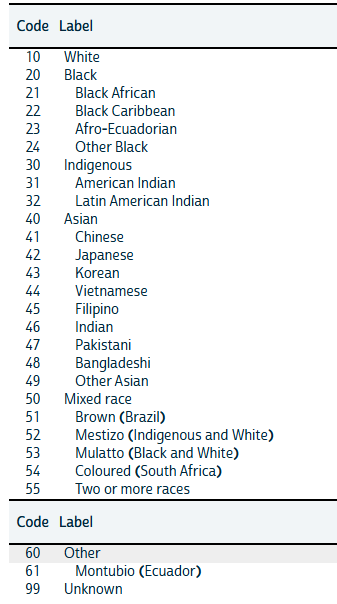

In [14]:
# Get the unique values of 'Race' column
df.RACE.unique()

array([10, 20, 60, 50, 40, 30])

In [15]:
# Race categories are reclassified through creating a new dictionary - 10 : 'White', 20: 'Black', 30: 'Indigenous', 40: 'Asian', 50: 'Misxed Race', 60: 'Other'
# Converting 31, 32 into 30; 41, 42, 43, 44, 45,46,49 into 40; 55 into 50

# Define the mapping dictionary for race categories 
race_mapping = { 10: 10, 20: 20, 31: 30, 32: 30, 41: 40, 42: 40, 43: 40, 44: 40, 45:40, 46:40, 49: 40, 
               55: 50, 60: 60}

# Apply the mapping to the 'race' column
df["RACE"] = df["RACE"].replace(race_mapping)
print(df.RACE)


0         10
1         10
2         10
3         10
4         10
          ..
128980    60
128981    60
128982    10
128983    10
128984    10
Name: RACE, Length: 128985, dtype: int32


In [16]:
# Group by GEO1_PR2020 and RACE, summing the 'PERWT' for calculation estimated population for each group 
grouped_data = df.groupby(['GEO1_PR2020', 'RACE']).agg(Estimated_pop=('PERWT', 'sum')).reset_index()
print(grouped_data)

# Calculate estimated population for each smaller geographic region
Estimated_population = grouped_data.groupby('GEO1_PR2020')['Estimated_pop'].sum().reset_index(name='Estimated_pop_GEOL2')
print(Estimated_population)

# Merge the estimated population back to the grouped data
grouped_data = grouped_data.merge(Estimated_population, on='GEO1_PR2020', how='left')

# Calculate the proportion (percentage) of people  by region
grouped_data['pct'] = grouped_data['Estimated_pop'] / grouped_data['Estimated_pop_GEOL2']*100

#rounding the value into 2 decimals
grouped_data['pct'] = grouped_data['pct'].round(2)


# Display the results
print(grouped_data)

     GEO1_PR2020  RACE  Estimated_pop
0            101    10         105722
1            101    20           4889
2            101    30            164
3            101    40             94
4            101    50          20441
..           ...   ...            ...
153         1102    20          32367
154         1102    30            104
155         1102    40            452
156         1102    50           3314
157         1102    60          31650

[158 rows x 3 columns]
    GEO1_PR2020  Estimated_pop_GEOL2
0           101               149549
1           102               115778
2           201               123359
3           202               103125
4           301               119185
5           302               123571
6           401               105782
7           402               149944
8           403               127383
9           501               136061
10          502               112414
11          503               109274
12          601               128260
13

#### Calculating Estimated Pop for "RACE" var

Variable List:
* 10 : WHITE_POP
* 20 : BLACK_POP
* 30 : INDIG_POP
* 40 : ASIAN_POP
* 50 : MIXED_RACE_POP
* 60 : OTHER_POP
* 99 : RACE_UK_POP

In [17]:
## Create a pivot table with RACE categories
pivot_table = grouped_data.pivot_table(
    index='GEO1_PR2020',  # Rows will be smaller geographic region
    columns='RACE',   # Columns will be RACE categories
    values='Estimated_pop',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table1)

# Rename the columns of pivot table for "RACE" variable
# rename it based on datatsets.
pivot_table_RACE = pivot_table.rename(columns={10: 'WHITE_POP', 20: 'BLACK_POP',30: 'INDIG_POP',40:'ASIAN_POP', 
                                       50: 'MIXED_RACE_POP', 60:'OTHER_POP' })

# Export the DataFrame to a CSV file
pivot_table_RACE.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\PuertoRico_2020\PR20_RACE.csv', index=False, encoding='utf-8')

# Print "RACE" variable in a pivot table
print("\nPivot table:\n", pivot_table_RACE)



RACE  GEO1_PR2020      10     20    30   40     50     60
0             101  105722   4889   164   94  20441  18239
1             102   83972   5438   229   20   5336  20783
2             201   49123   1987   282   73   6797  65097
3             202   28660   2847   183    6   3302  68127
4             301   79486   4347    51  987   9781  24533
5             302   93081   2000     0    0   2702  25788
6             401   75079   3883   135  126   4252  22307
7             402  103269   8257   179   47  22185  16007
8             403   63850  22311    42  123  33110   7947
9             501  101452   4505   327  118  16993  12666
10            502   73647  12701     0   44  13136  12886
11            503   79577   7952   134   33  10246  11332
12            601   93209   8612    93    0  18622   7724
13            602   74905  13183   308  133  31412  10175
14            701   54351  39031    15  212   8363  10564
15            801   54203   8105   114  152  16694  10464
16            

#### Calculating Percentage for "RACE" var

Variable List:
* 10 : WHITE_PCT
* 20 : BLACK_PCT
* 30 : INDIG_PCT
* 40 : ASIAN_PCT
* 50 : MIXED_RACE_PCT
* 60 : OTHER_PCT
* 99 : RACE_UK_PCT

In [18]:
## Create a pivot table with RACE categories
pivot_table = grouped_data.pivot_table(
    index='GEO1_PR2020',  # Rows will be smaller geographic region
    columns='RACE',   # Columns will be RACE categories
    values='pct',  # Values to be aggregated
    aggfunc='sum',        # Sum the values for aggregation
    fill_value=0          # Fill missing values with 0
)

pivot_table = pivot_table.reset_index()
print(pivot_table1)

# Rename the columns of pivot table for "RACE" variable
# rename it based on datatsets.
pivot_table_RACE = pivot_table.rename(columns={10: 'WHITE_PCT', 20: 'BLACK_PCT',30: 'INDIG_PCT',40:'ASIAN_PCT', 
                                       50: 'MiXED_RACE_PCT', 60:'OTHER_PCT' })


# Print "RACE" variable in a pivot table
print("\nPivot table:\n", pivot_table_RACE)



RACE  GEO1_PR2020      10     20    30   40     50     60
0             101  105722   4889   164   94  20441  18239
1             102   83972   5438   229   20   5336  20783
2             201   49123   1987   282   73   6797  65097
3             202   28660   2847   183    6   3302  68127
4             301   79486   4347    51  987   9781  24533
5             302   93081   2000     0    0   2702  25788
6             401   75079   3883   135  126   4252  22307
7             402  103269   8257   179   47  22185  16007
8             403   63850  22311    42  123  33110   7947
9             501  101452   4505   327  118  16993  12666
10            502   73647  12701     0   44  13136  12886
11            503   79577   7952   134   33  10246  11332
12            601   93209   8612    93    0  18622   7724
13            602   74905  13183   308  133  31412  10175
14            701   54351  39031    15  212   8363  10564
15            801   54203   8105   114  152  16694  10464
16            

In [19]:
# Ensure both 'GEO1_PR2020' are of the same data type, convert to integer
pivot_table_RACE['GEO1_PR2020'] = pivot_table_RACE['GEO1_PR2020'].astype(int)

# Load the previously exported csv file on MX2020A_INDIG
RACE_CSV_file = pd.read_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\PuertoRico_2020\PR20_RACE.csv')

# merge the PCT data to the RACE_CSV_file
merged_data = RACE_CSV_file.merge(pivot_table_RACE, on= 'GEO1_PR2020', how= 'left')

# Export the DataFrame to the previously exported CSV file
merged_data.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\PuertoRico_2020\PR20_RACE.csv', index=False)

# Display the modified DataFrame
print(merged_data)

    GEO1_PR2020  WHITE_POP  BLACK_POP  ...  ASIAN_PCT  MiXED_RACE_PCT  OTHER_PCT
0           101     105722       4889  ...       0.06           13.67      12.20
1           102      83972       5438  ...       0.02            4.61      17.95
2           201      49123       1987  ...       0.06            5.51      52.77
3           202      28660       2847  ...       0.01            3.20      66.06
4           301      79486       4347  ...       0.83            8.21      20.58
5           302      93081       2000  ...       0.00            2.19      20.87
6           401      75079       3883  ...       0.12            4.02      21.09
7           402     103269       8257  ...       0.03           14.80      10.68
8           403      63850      22311  ...       0.10           25.99       6.24
9           501     101452       4505  ...       0.09           12.49       9.31
10          502      73647      12701  ...       0.04           11.69      11.46
11          503      79577  

## Merging All Variables CSV into One

In [73]:
# Define the folder containing the CSV files
# Using Mexico_2020
folder_path = r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico_2020'

# Initialize an empty list to store DataFrames
dataframes = []

# Define the common field for merging
common_field = 'GEO2_MX2020'  # Replace with the actual common field name

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, dtype={'GEO2_MX2020': str})
        
        # Remove the column named 'Field1' if it exists
        if 'Field1' in df.columns:
            df = df.drop(columns=['Field1'])
        
        # Remove any columns that start with 'Unnamed'
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

        # Append the DataFrame to the list
        dataframes.append(df)

# Merge all DataFrames on the common field
merged_df = dataframes[0]
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on=common_field, how='outer', suffixes=('_left', '_right'))
    
# Ensure that 'GEO2_MX2020' column is of type string
merged_df['GEO2_MX2020'] = merged_df['GEO2_MX2020'].astype(str)

# Export the merged DataFrame to a new CSV file
merged_df.to_csv(r'C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico2020_merged.csv', index=False)

# Display the merged DataFrame
print(merged_df)


      YEAR  TOTAL_POP_MX20 GEO2_MX2020  ...  URBAN_HH  RURAL_PCT  URBAN_PCT
0     2020       125515554        1001  ...    893821       5.47      94.53
1     2020       125515554        1002  ...     21137      58.94      41.06
2     2020       125515554        1003  ...     33741      41.98      58.02
3     2020       125515554        1004  ...      9331      45.10      54.90
4     2020       125515554        1005  ...     95190      26.70      73.30
...    ...             ...         ...  ...       ...        ...        ...
2464  2020       125515554       32054  ...      4265      78.07      21.93
2465  2020       125515554       32055  ...     18311      41.72      58.28
2466  2020       125515554       32056  ...    138588       6.26      93.74
2467  2020       125515554       32057  ...     15980      21.85      78.15
2468  2020       125515554       32058  ...         0     100.00       0.00

[2469 rows x 59 columns]


# 2.  Joining the Dataset with Country Feature Layer

To join the dataset with the feature layer, it is necessary to align their data types. In the dataset, the geography variable (e.g., 'GEO2_MX2020' for Mexico 2020) is of integer data type, while in the feature layer, the geography variable (e.g., 'MUNI2020' for the shapefile) is of string data type. Therefore, the geography variable in the feature layer must be converted to an integer data type. The process involves the following steps:
* Right Click in the feature layer in Contents Pane
* Click to the "Data" > Click Export Features
* Write Output Feature Class as "CountryInitial_Year_GEOL2" (e.g MX_2020_GEOL2)
* Click "Edit" button in Export Features Pane
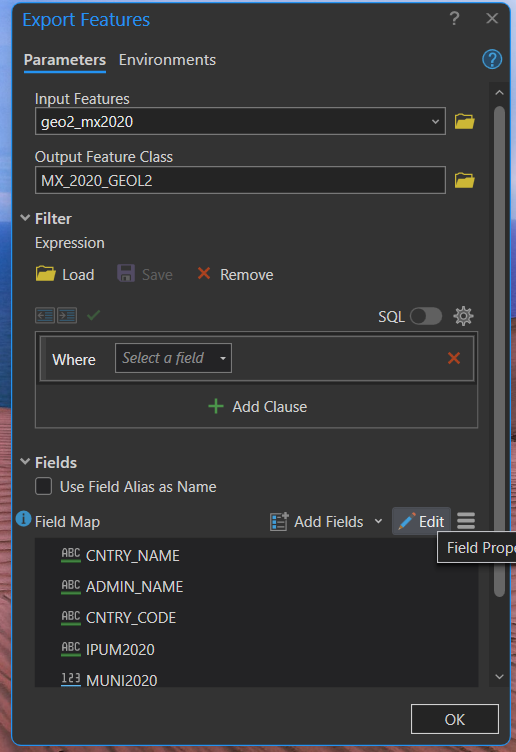
* Click "GEO Var" in Field Properties Pan
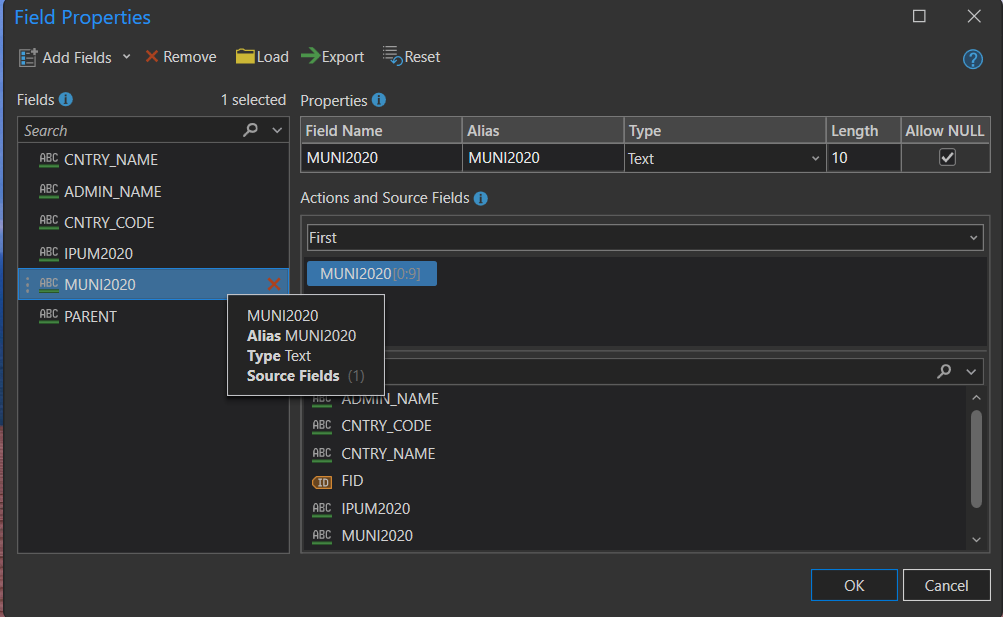
* Click drop down button of "GEO Var" Type, Select 'Long (32 bit integer)' and Click 'OK' button
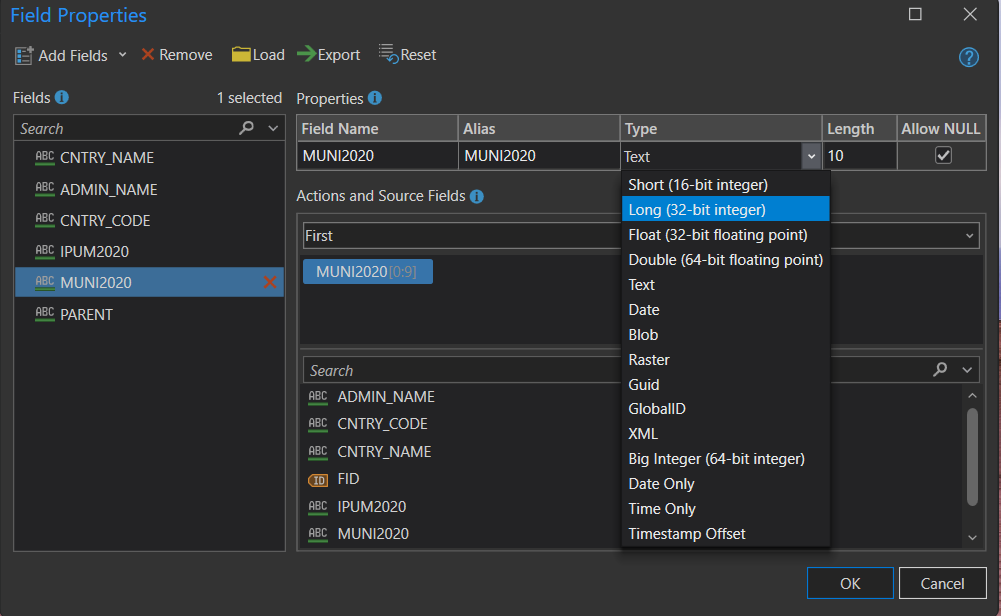
* Click 'OK' in Export Features Pane for creating new feature layer.


The following Python script uses ArcPy to perform a field join between a feature layer and a CSV file. The `JoinField` method is used to append data from the CSV to the feature layer based on a common field 

In [74]:
# Set the workspace (adjust this to your working directory)
arcpy.env.workspace = r"C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets"

# Define paths
feature_layer = r"C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Americas_Features.gdb\MX_2020_GEOL2"  # Path to the feature layer 
csv_file = r"C:\Users\Shwarna.Bhattacharje\Documents\IPUMS_Datasets\Dataset_output\Mexico2020_merged.csv"            # Path to the CSV file

# Define the field to join on (common in both the CSV and the feature layer)
join_field_feature = "MUNI2020"
join_field_csv = "GEO2_MX2020"

# Perform the join using JoinField
# Syntax: JoinField (in_data, in_field, join_table, join_field, fields_to_join)
arcpy.management.JoinField(feature_layer, join_field_feature, csv_file, join_field_csv)

print("JoinField operation completed successfully.")


JoinField operation completed successfully.
